In [190]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Model improvement and Evaluation 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print('tensorflow version', tf.__version__)
bank_data = pd.read_csv('data/1_american_dataset.csv')

training = pd.read_csv('data/train_american_bankruptcy.csv')
testing = pd.read_csv('data/test_american_bankruptcy.csv')
validation = pd.read_csv('data/validate_american_bankruptcy.csv')

# training (70%), validation (15%), testing (15%) 

X_train = training.drop(['status'], axis=1)
y_train = training['status']

X_test = testing.drop(['status'], axis=1)
y_test = testing['status']

X_validate = validation.drop(['status'], axis=1)
y_validate = validation['status']

class_names = ['Bankrupt', "Healthy"]

tensorflow version 2.11.0


In [191]:
print("y_train data distribution:\n", y_train.value_counts())
print("y_validate data distribution:\n", y_validate.value_counts())
print("y_test data distribution:\n", y_test.value_counts())

input_shape =

y_train data distribution:
 1    3444
0    3404
Name: status, dtype: int64
y_validate data distribution:
 0    785
1    719
Name: status, dtype: int64
y_test data distribution:
 0    783
1    783
Name: status, dtype: int64


## Model 1

In [145]:
def bankruptcy_model():
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(32, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(18, activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(9, activation='relu', input_shape=input_shape),
        # tf.keras.layers.Dense(4, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    model.compile(optimizer='adam', 
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=['accuracy'])
    return model

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    # tf.keras.callbacks.ModelCheckpoint(filepath='./best_model.h5', monitor='val_loss', save_best_only=True)
]

In [153]:
model = bankruptcy_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=200,
                    batch_size=25,
                    callbacks=callbacks,
                    # validation_steps=1,
                    # validation_batch_size=1504
                    # class_weight=class_weight
                    )

Epoch 1/200
274/274 [==============================] - 3s 4ms/step - loss: 0.6775 - accuracy: 0.5686 - val_loss: 0.6803 - val_accuracy: 0.5379
Epoch 2/200
274/274 [==============================] - 1s 2ms/step - loss: 0.6639 - accuracy: 0.5902 - val_loss: 0.6795 - val_accuracy: 0.5346
Epoch 3/200
274/274 [==============================] - 1s 3ms/step - loss: 0.6585 - accuracy: 0.5951 - val_loss: 0.6766 - val_accuracy: 0.5419
Epoch 4/200
274/274 [==============================] - 1s 3ms/step - loss: 0.6549 - accuracy: 0.5968 - val_loss: 0.6763 - val_accuracy: 0.5452
Epoch 5/200
274/274 [==============================] - 1s 3ms/step - loss: 0.6557 - accuracy: 0.5994 - val_loss: 0.6761 - val_accuracy: 0.5539
Epoch 6/200
274/274 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.6136 - val_loss: 0.6743 - val_accuracy: 0.5519
Epoch 7/200
274/274 [==============================] - 1s 2ms/step - loss: 0.6465 - accuracy: 0.6146 - val_loss: 0.6725 - val_accuracy: 0.5645

In [148]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot training & validation accuracy values
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Training Set', 'Validation Set'], loc='upper left')

    # Plot training & validation loss values
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Training Set', 'Validation Set'], loc='upper left')

    plt.show()

In [149]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 18)                342       
                                                                 
 batch_normalization_23 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dense_65 (Dense)            (None, 9)                 171       
                                                                 
 dense_66 (Dense)            (None, 1)                 10        
                                                                 
Total params: 595
Trainable params: 559
Non-trainable params: 36
_________________________________________________________________


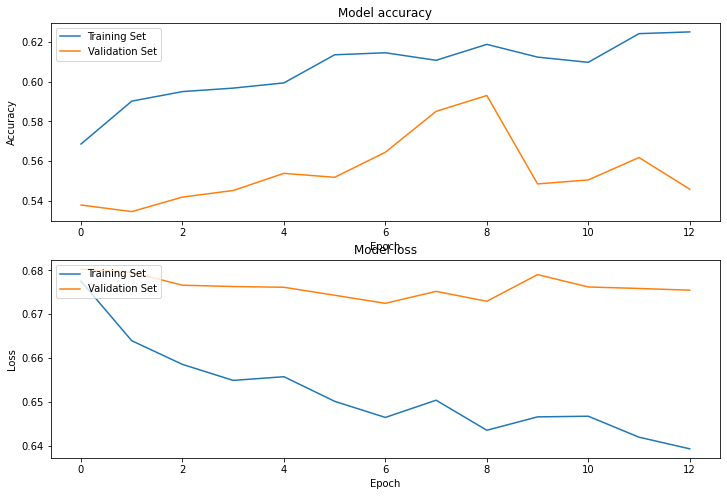

In [154]:
plot_history(history)

In [17]:
def plot_cm(cm):
    # Define class labels
    class_labels = ["Not Bankrupt", "Bankrupt"]

    # Create heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

    # Add labels and title
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")

    # Show plot
    plt.show()

In [18]:
y_predict_probs = model.predict(X_test)
print(y_predict_probs)

# Convert probabilities to binary predictions using a threshold of 0.5
y_predict = np.round(y_predict_probs)
print(y_predict)

49/49 [==============================] - 0s 1ms/step
[[0.56004983]
 [0.52442   ]
 [0.5234398 ]
 ...
 [0.5155869 ]
 [0.62786925]
 [0.614334  ]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


[[363 422]
 [145 636]]


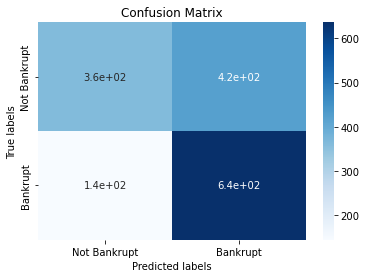

In [66]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
plot_cm(cm)

In [67]:
# Calculate F1 score
f1 = f1_score(y_test, y_predict)
print("F1 score: {:.2f}".format(f1))

F1 score: 0.69


## Model 2

In [41]:
def bankruptcy_model_v2(input_shape=(18,)):
    # Define the normalization layer
    # normalization_layer = tf.keras.layers.experimental.preprocessing.Normalization()

    # # Adapt the normalization layer to the data
    # data = tf.ones((1, 18))
    # normalization_layer(data)

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Normalization(),
        tf.keras.layers.Dense(18, activation='relu', input_shape=input_shape),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(9, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam', 
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss')
    ]
    return model


In [42]:
model2 = bankruptcy_model_v2()
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=100,
                    batch_size=25,
                    # callbacks=callbacks,
                    # class_weight=class_weight
                    )

Epoch 1/100
274/274 [==============================] - 2s 3ms/step - loss: 144.7428 - accuracy: 0.5478 - val_loss: 89.7437 - val_accuracy: 0.5618
Epoch 2/100
274/274 [==============================] - 1s 3ms/step - loss: 54.2865 - accuracy: 0.5770 - val_loss: 43.2012 - val_accuracy: 0.6057
Epoch 3/100
274/274 [==============================] - 1s 2ms/step - loss: 30.6450 - accuracy: 0.5848 - val_loss: 40.3529 - val_accuracy: 0.5891
Epoch 4/100
274/274 [==============================] - 1s 3ms/step - loss: 35.7473 - accuracy: 0.5822 - val_loss: 25.7440 - val_accuracy: 0.5898
Epoch 5/100
274/274 [==============================] - 1s 2ms/step - loss: 25.1536 - accuracy: 0.5863 - val_loss: 30.9724 - val_accuracy: 0.6004
Epoch 6/100
274/274 [==============================] - 1s 2ms/step - loss: 14.4681 - accuracy: 0.5888 - val_loss: 20.1376 - val_accuracy: 0.5791
Epoch 7/100
274/274 [==============================] - 1s 2ms/step - loss: 14.0833 - accuracy: 0.5882 - val_loss: 20.7923 - val_a

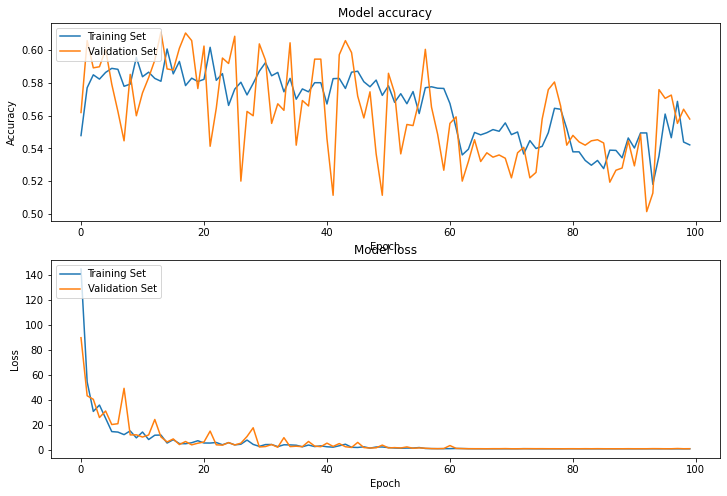

In [43]:
plot_history(history2)

In [49]:
y_predict_probs2 = model2.predict(X_test)
y_predict2 = np.round(y_predict_probs2)

49/49 [==============================] - 0s 2ms/step


[[679 106]
 [639 142]]


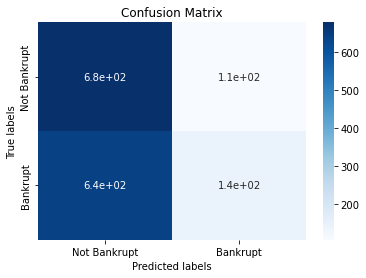

F1 score: 0.28


In [52]:
# plot confusion matrix
cm_2 = confusion_matrix(y_test, y_predict2)
print(cm_2)
plot_cm(cm_2)

# Calculate F1 score
f1 = f1_score(y_test, y_predict2)
print("F1 score: {:.2f}".format(f1))

## Model 3

In [176]:
def binary_classification_model(input_shape=(18,)):
    # # Define the normalization layer
    # normalization_layer = tf.keras.layers.experimental.preprocessing.Normalization()

    # # Adapt the normalization layer to the data
    # data = tf.ones((1, 18))
    # normalization_layer(data)
    
    model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Normalization(),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss')
    ]
    
    return model

In [175]:
model3 = binary_classification_model()
history3 = model3.fit(X_train, y_hot_train,
                    validation_data=(X_validate, y_hot_val),
                    epochs=100,
                    batch_size=24,
                    callbacks=callbacks,
                    # class_weight=class_weight
                    )

Epoch 1/100
286/286 [==============================] - 3s 3ms/step - loss: 234.2605 - accuracy: 0.4596 - val_loss: 173.0870 - val_accuracy: 0.4568
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 142.2921 - accuracy: 0.4685 - val_loss: 103.5417 - val_accuracy: 0.4721
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 89.1040 - accuracy: 0.4790 - val_loss: 58.7232 - val_accuracy: 0.4814
Epoch 4/100
286/286 [==============================] - 1s 2ms/step - loss: 48.6967 - accuracy: 0.4914 - val_loss: 38.7620 - val_accuracy: 0.4927
Epoch 5/100
286/286 [==============================] - 1s 2ms/step - loss: 34.1635 - accuracy: 0.5016 - val_loss: 30.0073 - val_accuracy: 0.5120
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 27.7624 - accuracy: 0.5145 - val_loss: 25.8708 - val_accuracy: 0.5193
Epoch 7/100
286/286 [==============================] - 1s 2ms/step - loss: 24.1299 - accuracy: 0.5237 - val_loss: 23.2693 - va

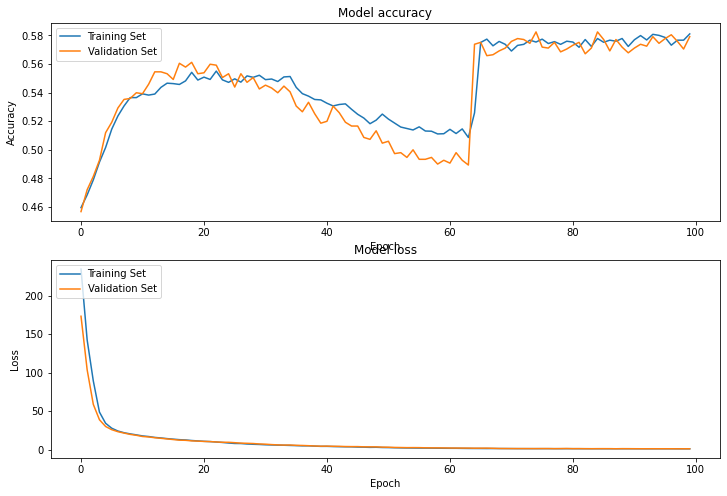

In [177]:
plot_history(history3)

In [53]:
y_predict_probs3 = model2.predict(X_test)
y_predict3 = np.round(y_predict_probs3)

49/49 [==============================] - 0s 3ms/step


[[679 106]
 [639 142]]


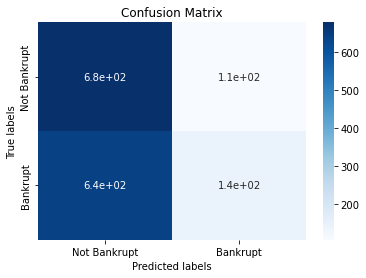

F1 score: 0.28


In [54]:
# plot confusion matrix
cm_3 = confusion_matrix(y_test, y_predict3)
print(cm_3)
plot_cm(cm_3)

# Calculate F1 score
f1 = f1_score(y_test, y_predict3)
print("F1 score: {:.2f}".format(f1))

In [41]:
# def binary_classification_model_4(input_shape=(18,)):
#     # create input layer
#     inputs = tf.keras.Input(shape=input_shape)
    
#     # create normalization layer
#     normalization = tf.keras.layers.experimental.preprocessing.Normalization()
#     x = normalization(inputs)
    
#     # create hidden layers
#     x = tf.keras.layers.Dense(18, activation='relu')(x)
#     x = tf.keras.layers.Dense(9, activation='relu')(x)
#     # create output layer
#     outputs = tf.keras.layers.Dense(1, activation='softmax')(x)
    
#     # create model
#     model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
#     # compile model
#     model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
    
#     return model

## Model 4 - Softmax

In [160]:
def binary_classification_model_4(input_shape=(18,)):
    # # Define the normalization layer
    # normalization_layer = tf.keras.layers.experimental.preprocessing.Normalization()

    # # Adapt the normalization layer to the data
    # data = tf.ones((1, 18))
    # normalization_layer(data)
    
    model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Normalization(),
        tf.keras.layers.Dense(18, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(9, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax'),
        # tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='Adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss')
    ]
    
    return model

In [158]:
y_hot_train = tf.one_hot(y_train, 2)
y_hot_val = tf.one_hot(y_validate, 2)
y_hot_test = tf.one_hot(y_test, 2)

In [163]:
model4 = binary_classification_model_4()
history4 = model4.fit(X_train, y_hot_train,
                    validation_data=(X_validate, y_hot_val),
                    epochs=100,
                    batch_size=24,
                    callbacks=callbacks,
                    # class_weight=class_weight
                    )

Epoch 1/100
381/381 [==============================] - 3s 3ms/step - loss: 60.8452 - accuracy: 0.5648 - val_loss: 17.9210 - val_accuracy: 0.5745
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 9.5146 - accuracy: 0.5015 - val_loss: 3.3618 - val_accuracy: 0.4621
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 3.8232 - accuracy: 0.4977 - val_loss: 2.6254 - val_accuracy: 0.4867
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 2.5555 - accuracy: 0.4937 - val_loss: 1.3534 - val_accuracy: 0.4801
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 1.9724 - accuracy: 0.4981 - val_loss: 1.4388 - val_accuracy: 0.4840
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 1.5125 - accuracy: 0.5362 - val_loss: 1.0184 - val_accuracy: 0.5505
Epoch 7/100
381/381 [==============================] - 1s 3ms/step - loss: 1.2447 - accuracy: 0.5258 - val_loss: 0.9311 - val_accuracy: 0.53

KeyboardInterrupt: 

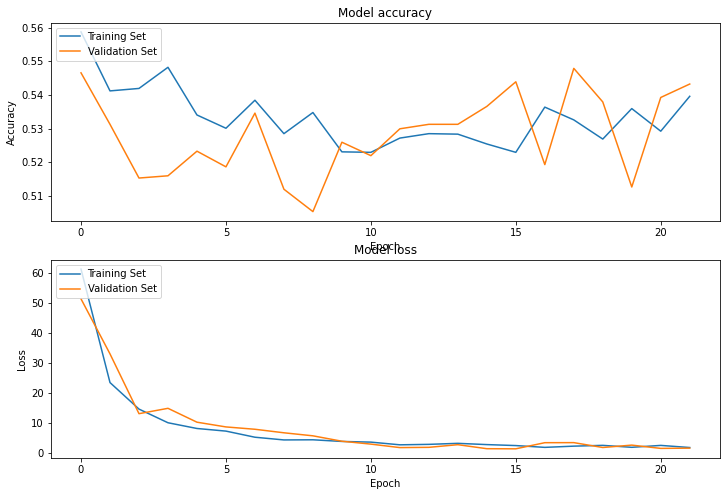

In [162]:
plot_history(history4)

In [135]:
y_pred_probs4 = model.predict(X_test)
print(y_pred_probs4)

y_predict4 = np.round(y_pred_probs4)# Convert probabilities to binary predictions using a threshold of 0.5
print (y_predict4)
# print(y_predict4)

49/49 [==============================] - 0s 2ms/step
[[0.5222648 ]
 [0.5137382 ]
 [0.48392394]
 ...
 [0.5090069 ]
 [0.5819428 ]
 [0.5641756 ]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


[1 1 0 ... 1 1 1]
[[179 606]
 [ 71 710]]


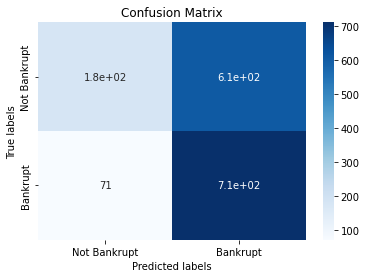

In [136]:
# conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
num_classes = 2

# from lable to categorial
y_prediction = np.array([1,2]) 
y_categorial = tf.keras.utils.to_categorical(y_predict4, num_classes)

# from categorial to lable indexing
y_pred = y_categorial.argmax(1)

print(y_pred)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
plot_cm(conf_mat)